## 1 - Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

## 2 - Logistic Regression

In [2]:
# load dataset
X_train, y_train = load_data("data/ex2data1.txt")

In [3]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [4]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [5]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


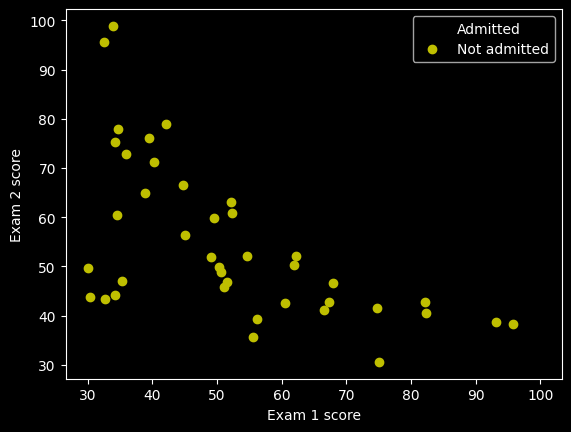

In [6]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

# Exercise 1
## 2.3 Sigmoid function

In [22]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    g = 1/(1+np.exp(-z))
    
    ### END SOLUTION ###  
    
    return g

In [23]:
# Note: You can edit this value
value = -1

print (f"sigmoid({value}) = {sigmoid(value)}")
# print(sigmoid(0))

sigmoid(-1) = 0.2689414213699951


In [24]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


## Exercise 2
## 2.4 Cost function for logistic regression

In [147]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    F_wb = sigmoid(np.dot(X,w) + b)
    
    F_loss = np.dot(-y,np.log(F_wb)) - np.dot((1-y),np.log(1-F_wb))
    
    total_cost = F_loss / m
  
    ### END CODE HERE ### 

    return total_cost

In [150]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)

Cost at test w and b (non-zeros): 0.218
All tests passed!


# 2.5 Gradient for logistic regression

## Exercise 3

In [151]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    
  
    
    ### START CODE HERE ### 
    for i in range(m):
        z_wb = None
        for j in range(n): 
            z_wb += None
        z_wb += None
        f_wb = None
        
        dj_db_i = None
        dj_db += None
        
        for j in range(n):
            dj_dw[j] = None
            
    dj_dw = None
    dj_db = None
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [157]:

import numpy as np

def compute_gradient(X, y, w, b, *argv):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    
    ### START CODE HERE ### 
    for i in range(m):
        # Compute z = w * x + b
        z_wb = np.dot(X[i], w) + b
        
        # Compute f_wb = sigmoid(z)
        f_wb = 1 / (1 + np.exp(-z_wb))
        
        # Compute the gradient of the loss with respect to b
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        # Compute the gradient of the loss with respect to w
        for j in range(n):
            dj_dw[j] += dj_db_i * X[i, j]
            
    # Average over all examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    ### END CODE HERE ###

    return dj_db, dj_dw


In [158]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [160]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)

dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]
All tests passed!


# Exercise 4

In [ ]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i], w) + b 
        f_wb = 1 / (1 + np.exp(-z_wb))
        
        if f_wb >= 0.5:
          p[i] = 1
        else:
          p[i] = 0 
        
    ### END CODE HERE ### 
    return p

In [161]:
import numpy as np

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        # Compute z = w * x + b
        z_wb = np.dot(X[i], w) + b
        
        # Calculate the prediction for this example using the sigmoid function
        f_wb = 1 / (1 + np.exp(-z_wb))

        # Apply the threshold to convert probabilities to binary predictions
        if f_wb >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
        
    ### END CODE HERE ### 
    return p


In [162]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


# Exercise 5

In [ ]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # You need to calculate this value
    reg_cost = 0.
    
    ### START CODE HERE ###
    
        
    
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [163]:
import numpy as np

def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples with regularization
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b)  # You should have implemented this function earlier
    
    # Calculate the regularization cost
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost


In [165]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
# compute_cost_reg_test(compute_cost_reg)

Regularized cost : nan


/var/folders/8v/2l8mtcxj4sjf0ld4nx91607h0000gn/T/ipykernel_92695/2638189054.py:17: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))
/var/folders/8v/2l8mtcxj4sjf0ld4nx91607h0000gn/T/ipykernel_92695/3220879444.py:22: RuntimeWarning: divide by zero encountered in log
  F_loss = np.dot(-y,np.log(F_wb)) - np.dot((1-y),np.log(1-F_wb))


In [166]:
import numpy as np

def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for logistic regression with regularization
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
    """
    m, n = X.shape
    
    # Compute the gradient without regularization
    dj_db, dj_dw = compute_gradient(X, y, w, b)  # You should have implemented this function earlier

    ### START CODE HERE ###     
    # Add regularization to the gradient of the weights
    dj_dw += (lambda_ / m) * w
    ### END CODE HERE ###         
        
    return dj_db, dj_dw


In [167]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.28
First few elements of regularized dj_dw:
 [16.237444240683217, 12.047326628088538, 1026.397204362715, 696.2311299647832]
All tests passed!


/var/folders/8v/2l8mtcxj4sjf0ld4nx91607h0000gn/T/ipykernel_92695/2663770091.py:28: RuntimeWarning: overflow encountered in exp
  f_wb = 1 / (1 + np.exp(-z_wb))
